In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [274]:
def plot_hyperparams(data, hyperparams, metric1, metric2):
  colors = cm.tab20(np.linspace(0, 1, data.shape[0]))
  fig = plt.figure(figsize=(12,6))
  for i in range(data.shape[0]):
    plt.scatter(d[metric1][i], d[metric2][i], label=d.loc[i, hyperparams],
                color=colors[i], marker='x', s=300, linewidth=5)
  plt.xlabel(metric1)
  plt.ylabel(metric2)
  plt.legend(bbox_to_anchor=(1.3, 1.05))

In [292]:
path = 'logs/adult/'
experiment = 'basic'
fname = path + experiment + '-eval.csv'

In [293]:
d = pd.read_csv(fname)
d = d[d.evaluation_file == 'valid_set']
d.drop('Unnamed: 0', axis=1, inplace=True)
d.reset_index(drop=True, inplace=True)

In [294]:
d.head()

,evaluation_file,learning_rate,total_num_iters,n_h,n_h_adv,dropout_rate,alpha,accuracy,roc_auc,count_0,...,parity_gap_0,fp_gap_0,fn_gap_0,calibration_pos_gap_0,calibration_neg_gap_0,parity_gap_1,fp_gap_1,fn_gap_1,calibration_pos_gap_1,calibration_neg_gap_1
0,valid_set,0.001,2000,10,NaN,0.2,NaN,0.786986,0.825072,1091,...,0.116177,0.062079,0.149466,0.0,0.0,0.116177,0.062079,0.149466,0.0,0.0
1,valid_set,0.001,2000,10,NaN,0.5,NaN,0.783917,0.824983,1091,...,0.185863,0.114218,0.268173,0.0,0.0,0.185863,0.114218,0.268173,0.0,0.0
2,valid_set,0.001,2000,100,NaN,0.2,NaN,0.776550,0.819247,1091,...,0.049317,0.020635,0.048688,0.0,0.0,0.049317,0.020635,0.048688,0.0,0.0
3,valid_set,0.001,2000,100,NaN,0.5,NaN,0.782075,0.808621,1091,...,0.093288,0.048710,0.116569,0.0,0.0,0.093288,0.048710,0.116569,0.0,0.0
4,valid_set,0.010,2000,10,NaN,0.2,NaN,0.777164,0.800908,1091,...,0.076840,0.038015,0.109086,0.0,0.0,0.076840,0.038015,0.109086,0.0,0.0


In [295]:
hyperparams = ['learning_rate', 'total_num_iters', 'n_h', 'n_h_adv', 'dropout_rate', 'alpha']
metrics = [col for col in d.columns if col not in hyperparams and col != 'Unnamed: 0']
print(hyperparams)
print(metrics)
hyperparams_to_plot = [col for col in hyperparams if col not in ['total_num_iters']]

['learning_rate', 'total_num_iters', 'n_h', 'n_h_adv', 'dropout_rate', 'alpha']
['evaluation_file', 'accuracy', 'roc_auc', 'count_0', 'y_hat_0', 'accuracy_0', 'true_neg_0', 'false_neg_0', 'false_pos_0', 'true_pos_0', 'fp_0', 'fn_0', 'calibration_pos_0', 'calibration_neg_0', 'count_1', 'y_hat_1', 'accuracy_1', 'true_neg_1', 'false_neg_1', 'false_pos_1', 'true_pos_1', 'fp_1', 'fn_1', 'calibration_pos_1', 'calibration_neg_1', 'parity_gap_0', 'fp_gap_0', 'fn_gap_0', 'calibration_pos_gap_0', 'calibration_neg_gap_0', 'parity_gap_1', 'fp_gap_1', 'fn_gap_1', 'calibration_pos_gap_1', 'calibration_neg_gap_1']


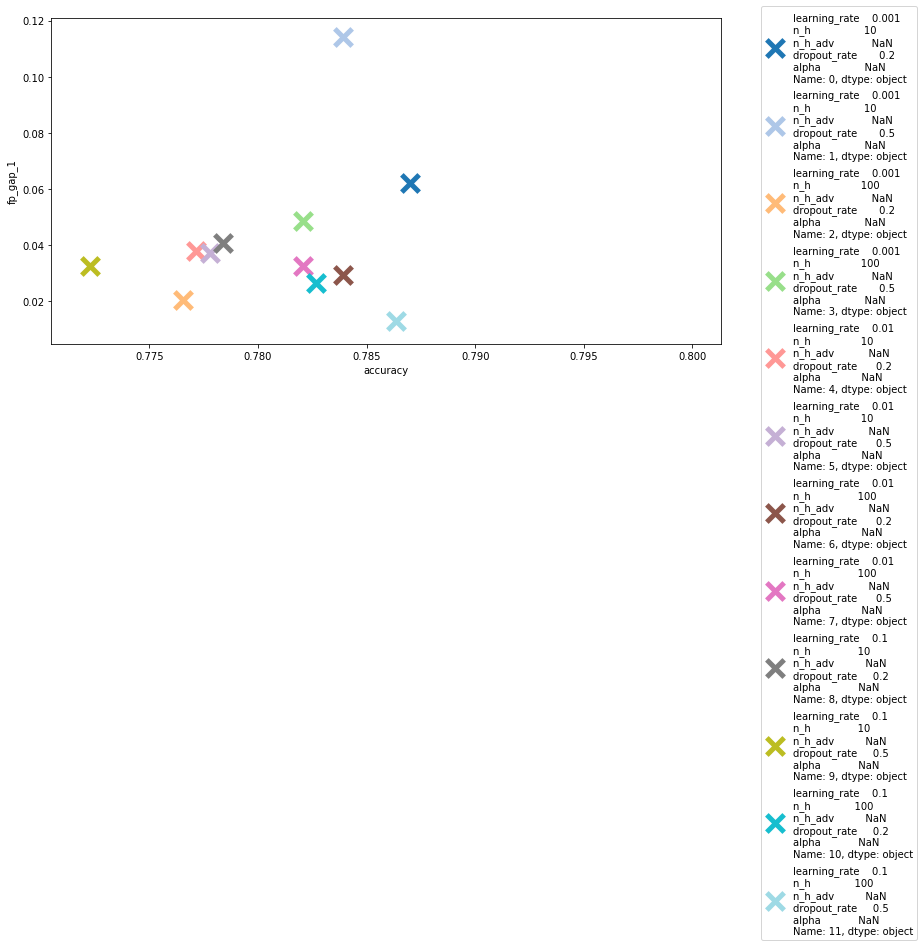

In [296]:
plot_hyperparams(d, hyperparams_to_plot, 'accuracy', 'fp_gap_1')